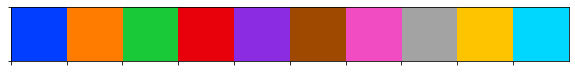

In [1]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# try different palette for plotting
# sns.set_palette(sns.color_palette("Paired", 20))
# sns.set_palette(sns.diverging_palette(255, 133, l=60, n=16, center="dark"))
colors3 = ["#9d6d00", "#903ee0", "#11dc79", "#f568ff", "#419500", "#013fb0", 
          "#f2b64c", "#007ae4", "#ff905a", "#33d3e3", "#9e003a", "#019085", 
          "#950065", "#afc98f", "#ff9bfa", "#83221d", "#01668a", "#ff7c7c", 
          "#643561", "#75608a"]
palette1 = sns.color_palette("BuGn", 6)[::-1][:4] \
           + sns.color_palette("OrRd", 6)[1:] \
           + sns.color_palette("PuBu", 6)[::-1][:-2] \
           + sns.color_palette("RdGy", 10)[6:]
palette1 = sns.color_palette("BuGn", 3) \
           + sns.color_palette("OrRd", 3) \
           + sns.color_palette("PuBu", 3) \
           + sns.color_palette("RdGy", 6)[::-1][:1]
sns.set_palette("bright",10)
sns.palplot(sns.color_palette())

In [2]:
# source https://github.com/CSSEGISandData/COVID-19/
# transpose matrices for better data handling

# confirmed COVID-19 positive cases
conf = pd.read_csv("../csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv").transpose()
# deceased cases
deaths = pd.read_csv("../csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv").transpose()
# recovery cases
recover = pd.read_csv("../csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv").transpose()

conf.head()

,0,1,2,3,4,5,6,7,8,9,...,467,468,469,470,471,472,473,474,475,476
Province/State,NaN,NaN,NaN,NaN,NaN,British Columbia,New South Wales,Victoria,Queensland,NaN,...,NaN,NaN,NaN,NaN,NaN,Sint Maarten,NaN,NaN,Isle of Man,NaN
Country/Region,Thailand,Japan,Singapore,Nepal,Malaysia,Canada,Australia,Australia,Australia,Cambodia,...,Nicaragua,Madagascar,Haiti,Angola,Cabo Verde,Netherlands,Niger,Papua New Guinea,United Kingdom,Zimbabwe
Lat,15,36,1.2833,28.1667,2.5,49.2827,-33.8688,-37.8136,-28.0167,11.55,...,12.8654,-18.7669,18.9712,-11.2027,16.5388,18.0425,17.6078,-6.315,54.2361,-20
Long,101,138,103.833,84.25,112.5,-123.121,151.209,144.963,153.4,104.917,...,-85.2072,46.8691,-72.2852,17.8739,-23.0418,-63.0548,8.0817,143.956,-4.5481,30
1/22/20,2,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# assign second row as column names
conf.columns = conf.iloc[1]
deaths.columns = deaths.iloc[1]
recover.columns = recover.iloc[1]

In [4]:
# remove first 4 rows
conf = conf.iloc[4:]
deaths = deaths.iloc[4:]
recover = recover.iloc[4:]

In [5]:
# list contry names
# set(list(conf.columns.values))

In [6]:
# data are divided by province: sum provinces to obtain numbers by country
# China was not affected uniformly, therefore the population scaled numbers appear low (I will add the provence numbers lated)
conf = conf.groupby(by=conf.columns, axis=1).sum()
deaths = deaths.groupby(by=deaths.columns, axis=1).sum()
recover = recover.groupby(by=recover.columns, axis=1).sum()

In [7]:
# pos_1_10 = conf.max().sort_values(ascending=False)[:10].index
contries_ordered = conf.max().sort_values(ascending=False)
print(contries_ordered[:10])

Country/Region
China             81250.0
Italy             47021.0
Spain             20410.0
Germany           19848.0
Iran              19644.0
US                19100.0
France            12726.0
Korea, South       8652.0
Switzerland        5294.0
United Kingdom     4014.0
dtype: float64


In [8]:
# select only countries with > 900 positive COVID-19 cases
# selected_columns = conf.max()>900
# selected_columns = conf.max().sort_values(ascending=False)[:10]
# conf = conf.loc[:,selected_columns]
# deaths = deaths.loc[:,selected_columns]
# recover = recover.loc[:,selected_columns]

# sort columns by total number of positive cases
# # conf = conf.sort_values(conf.last_valid_index(), axis=1, ascending=False)
# deaths = deaths.sort_values(deaths.last_valid_index(), axis=1, ascending=False)
# recover = recover.sort_values(recover.last_valid_index(), axis=1, ascending=False)

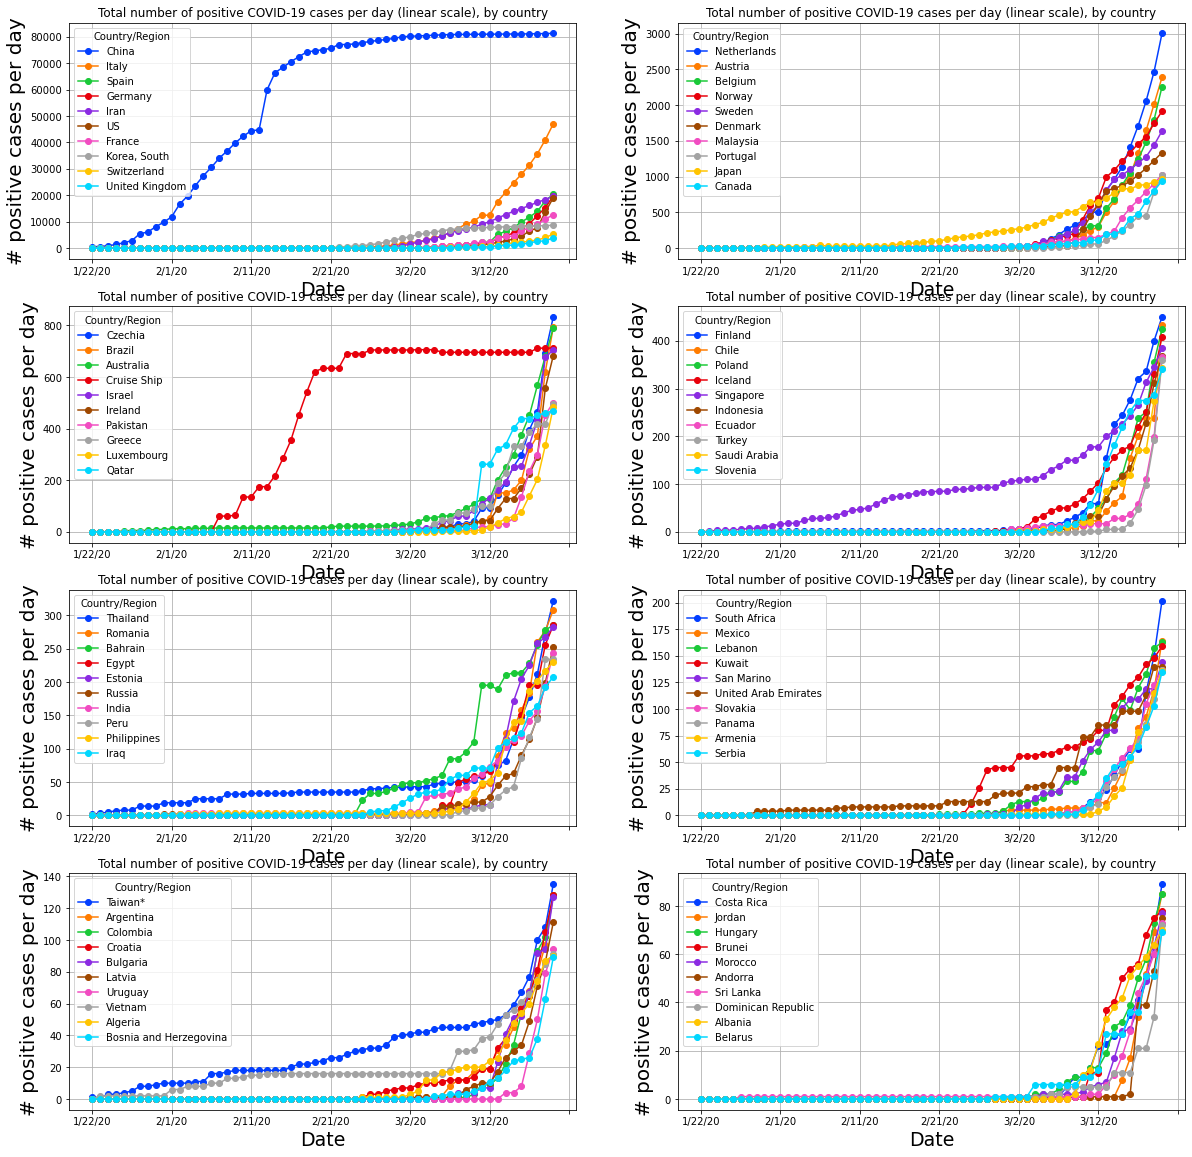

In [9]:
nrow=4
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered[count*10:(count+1)*10].index
        # print(count*10,(count+1)*10,plot_countries)
        conf[plot_countries].plot(grid=True, marker='o', ax=axes[r,c],
                 title='Total number of positive COVID-19 cases (linear scale), by country', figsize = (20,20))
        axes[r,c].set_xlabel("Date", fontsize=19)
        axes[r,c].set_ylabel("# positive cases", fontsize=20)
        count+=1

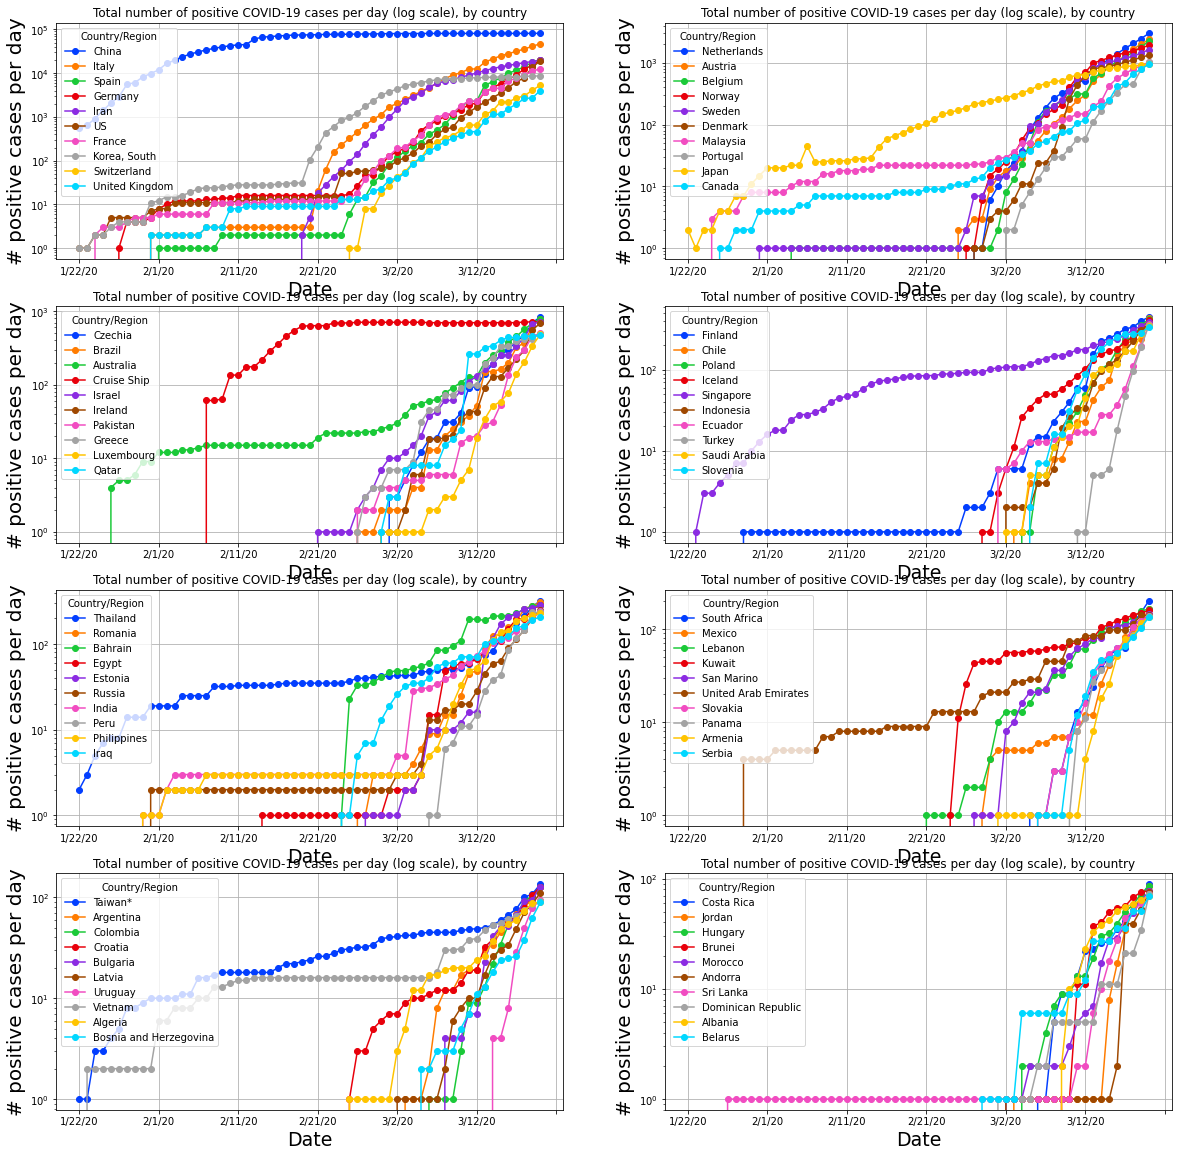

In [10]:
nrow=4
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered[count*10:(count+1)*10].index
        # print(count*10,(count+1)*10,plot_countries)
        conf[plot_countries].plot(logy=True, grid=True, marker='o', ax=axes[r,c],
                 title='Total number of positive COVID-19 cases (log scale), by country', figsize = (20,20))
        axes[r,c].set_xlabel("Date", fontsize=19)
        axes[r,c].set_ylabel("# positive cases", fontsize=20)
        count+=1

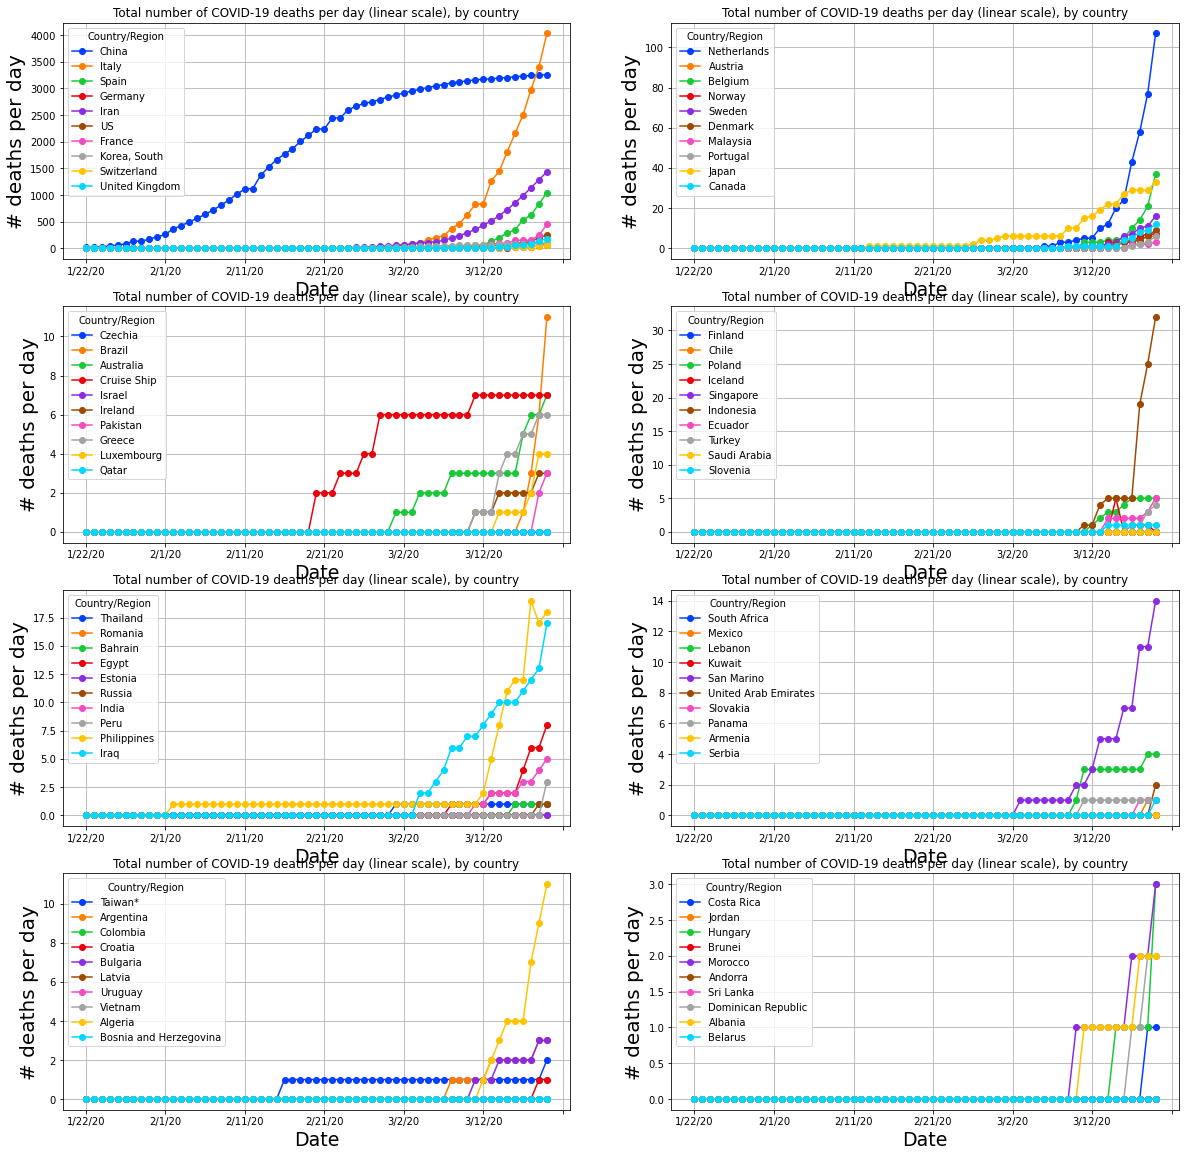

In [11]:
nrow=4
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered[count*10:(count+1)*10].index
        # print(count*10,(count+1)*10,plot_countries)
        deaths[plot_countries].plot(grid=True, marker='o', ax=axes[r,c],
                 title='Total number of COVID-19 deaths (linear scale), by country', figsize = (20,20))
        axes[r,c].set_xlabel("Date", fontsize=19)
        axes[r,c].set_ylabel("# deaths", fontsize=20)
        count+=1

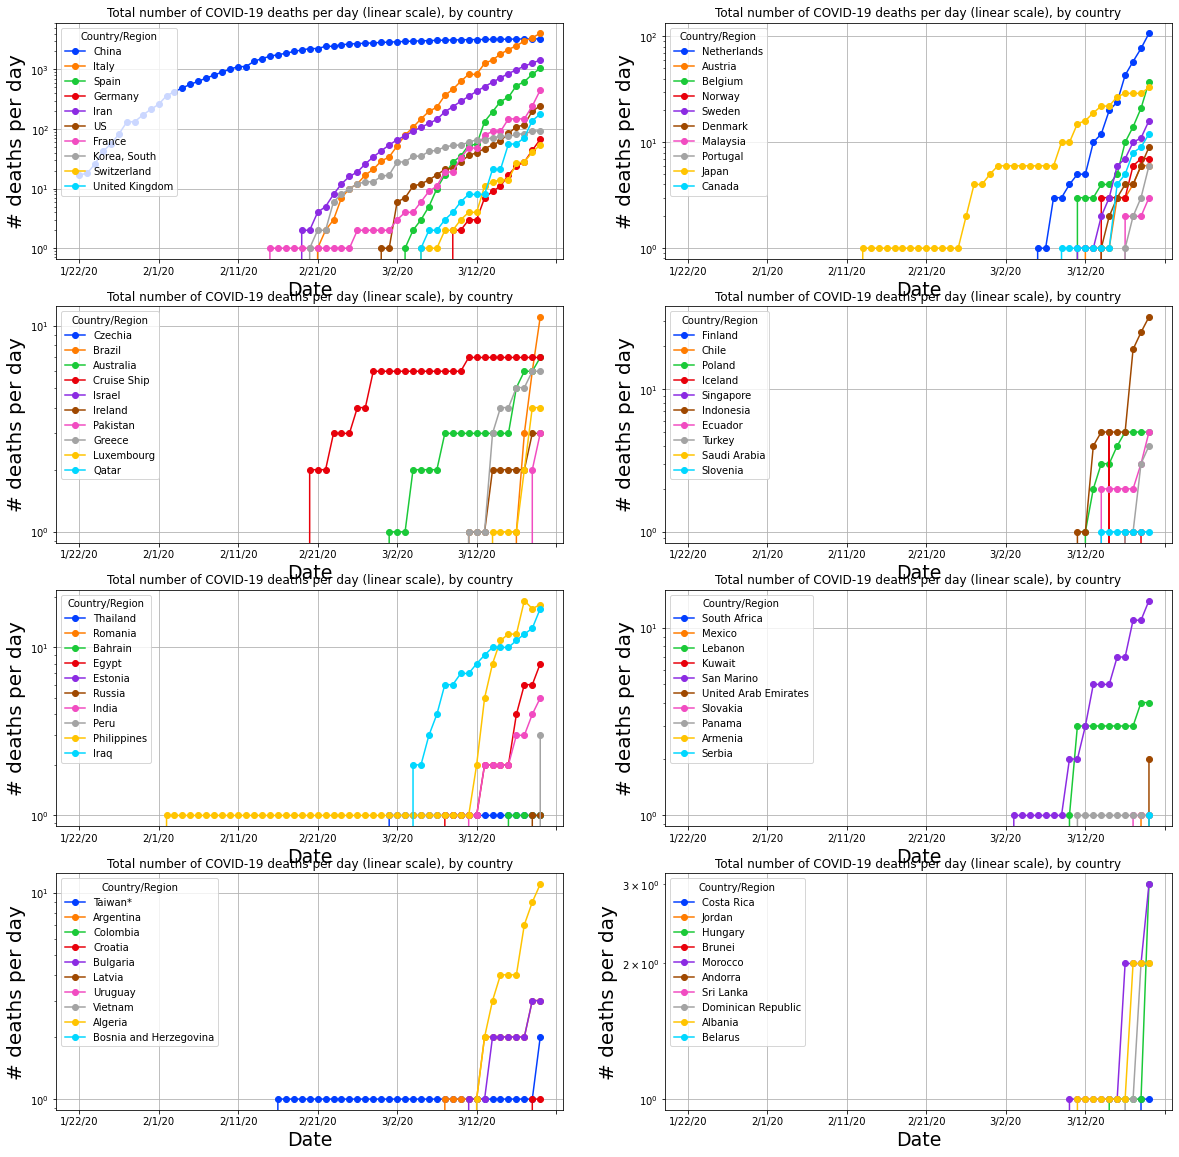

In [12]:
nrow=4
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered[count*10:(count+1)*10].index
        # print(count*10,(count+1)*10,plot_countries)
        deaths[plot_countries].plot(logy=True, grid=True, marker='o', ax=axes[r,c],
                 title='Total number of COVID-19 deaths (linear scale), by country', figsize = (20,20))
        axes[r,c].set_xlabel("Date", fontsize=19)
        axes[r,c].set_ylabel("# deaths", fontsize=20)
        count+=1

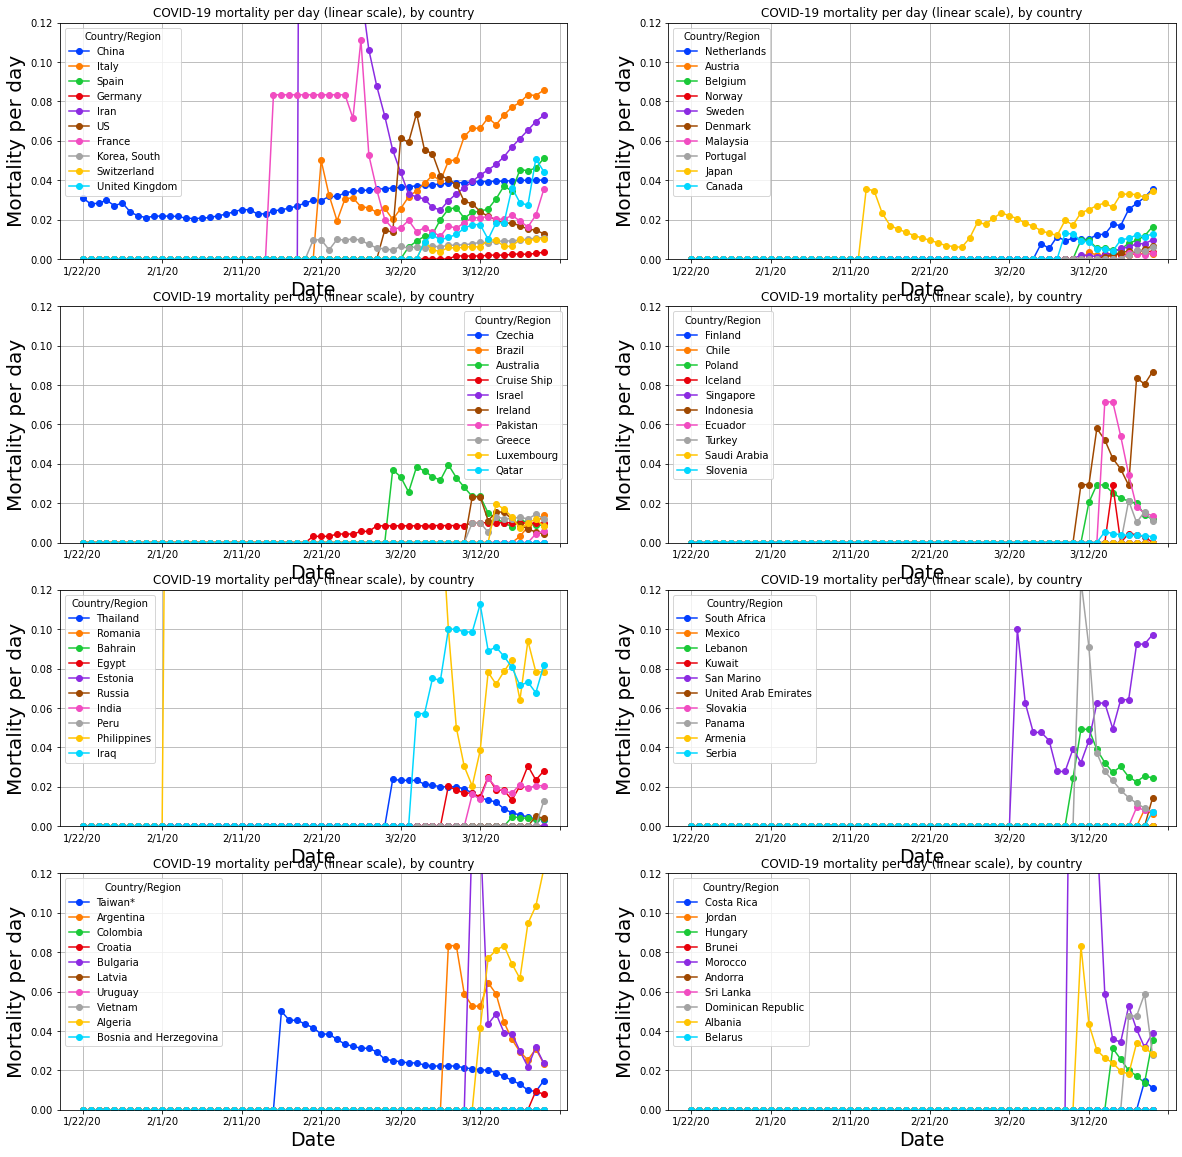

In [13]:
mortality = deaths.divide(conf.replace(0, 1))

nrow=4
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered[count*10:(count+1)*10].index
        # print(count*10,(count+1)*10,plot_countries)
        mortality[plot_countries].plot(grid=True, marker='o', ax=axes[r,c],
                 title='COVID-19 mortality rate (linear scale), by country', figsize = (20,20))
        axes[r,c].set_xlabel("Date", fontsize=19)
        axes[r,c].set_ylabel("Mortality rate", fontsize=20)
        axes[r,c].set_ylim(0,0.12)
        count+=1

In [14]:
# retrieve population information
# source https://population.un.org/wpp/Download/Standard/Population/
population = pd.read_csv("../external_data/WPP2019_TotalPopulationBySex.csv")

In [15]:
# select only country codes for year 2020, transpose and remove columns to make it similar to COVID-19 data
population = population[(population["Time"] == 2020) & (population["VarID"] == 2) & (population["LocID"] < 910)]
population = population[["Location","PopTotal"]].transpose()
population.columns = population.iloc[0]
population = population.iloc[1:]
population.head()
# population numbers are expressed in 1e3

Location,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Wallis and Futuna Islands,Western Sahara,World,Yemen,Zambia,Zimbabwe
PopTotal,38928.3,1.3406e+06,2877.8,43851,55.197,77.265,32866.3,15.002,97.928,45195.8,...,33469.2,307.15,28435.9,97338.6,11.246,597.33,7.7948e+06,29826,18384,14862.9


In [16]:
# list country names
# set(list(population.columns.values))

In [17]:
# rename population country names that don't match COVID-19 data
population = population.rename(columns={
 'Bolivia (Plurinational State of)': 'Bolivia',
 'Brunei Darussalam': 'Brunei',
 'Congo (Kinshasa)': 'Congo',
 "Cote d'Ivoire":  "Côte d'Ivoire",
 'Iran (Islamic Republic of)':  'Iran',
 'Republic of Korea': 'Korea, South',
 'Republic of Moldova':  'Moldova',
 'Russian Federation':  'Russia',
 'China, Taiwan Province of China':  'Taiwan*',
 'United States of America':  'US',
 'Viet Nam':  'Vietnam'
    }
        )

In [18]:
# concatenate dataset
conf_pop_norm = pd.concat([population,conf])
conf_pop_norm.head()

,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,Zimbabwe,"Bahamas, The",Congo (Brazzaville),Congo (Kinshasa),Cote d'Ivoire,Cruise Ship,"Gambia, The",Kosovo,Tanzania,Venezuela
PopTotal,38928.3,1.3406e+06,2877.8,43851,55.197,77.265,32866.3,15.002,97.928,45195.8,...,14862.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/22/20,0,NaN,0,0,NaN,0,0,NaN,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/23/20,0,NaN,0,0,NaN,0,0,NaN,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/24/20,0,NaN,0,0,NaN,0,0,NaN,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/25/20,0,NaN,0,0,NaN,0,0,NaN,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# divide cases rows by population/10 row to obtain number of cases per 1e4 persons
conf_pop_norm = conf_pop_norm.loc[:].div(conf_pop_norm.iloc[0][:]/10)

In [20]:
# remove population row
conf_pop_norm = conf_pop_norm.iloc[1:]
conf_pop_norm.dropna(axis=1, inplace=True)
conf_pop_norm.tail()

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Turkey,Ukraine,United Arab Emirates,United Kingdom,US,Uruguay,Uzbekistan,Vietnam,Zambia,Zimbabwe
3/16/20,0.00539453,0.177219,0.0123144,0.258849,0,0.102116,0.0123905,0.175484,0.147844,1.13031,...,0.00213424,0.00160059,0.099086,0.228471,0.139938,0.02303,0.00179269,0.00626679,0,0
3/17/20,0.00565141,0.191118,0.0136827,5.04756,0,0.102116,0.0150457,0.263226,0.177256,1.47895,...,0.00557274,0.00320119,0.099086,0.288719,0.193986,0.0834838,0.00298782,0.00678046,0,0
3/18/20,0.00565141,0.205018,0.0168753,5.04756,0,0.102116,0.0174795,0.283474,0.222746,1.82759,...,0.0116198,0.00320119,0.114252,0.389182,0.235134,0.143938,0.00448173,0.00770506,0.00108791,0
3/19/20,0.00565141,0.222392,0.0198399,6.85951,0,0.102116,0.0214622,0.388089,0.26706,2.23508,...,0.0227653,0.0036585,0.141551,0.400082,0.413199,0.227421,0.00687199,0.00873241,0.00108791,0
3/20/20,0.00616517,0.243241,0.020524,9.70685,0.000304263,0.102116,0.0283212,0.458958,0.310198,2.65145,...,0.0425663,0.00663103,0.141551,0.591285,0.577035,0.270603,0.00985981,0.00934881,0.00108791,0.000672815


In [21]:
contries_pop_norm_ordered = conf_pop_norm.max().sort_values(ascending=False)
small_countries = ["San Marino", "Holy See"]


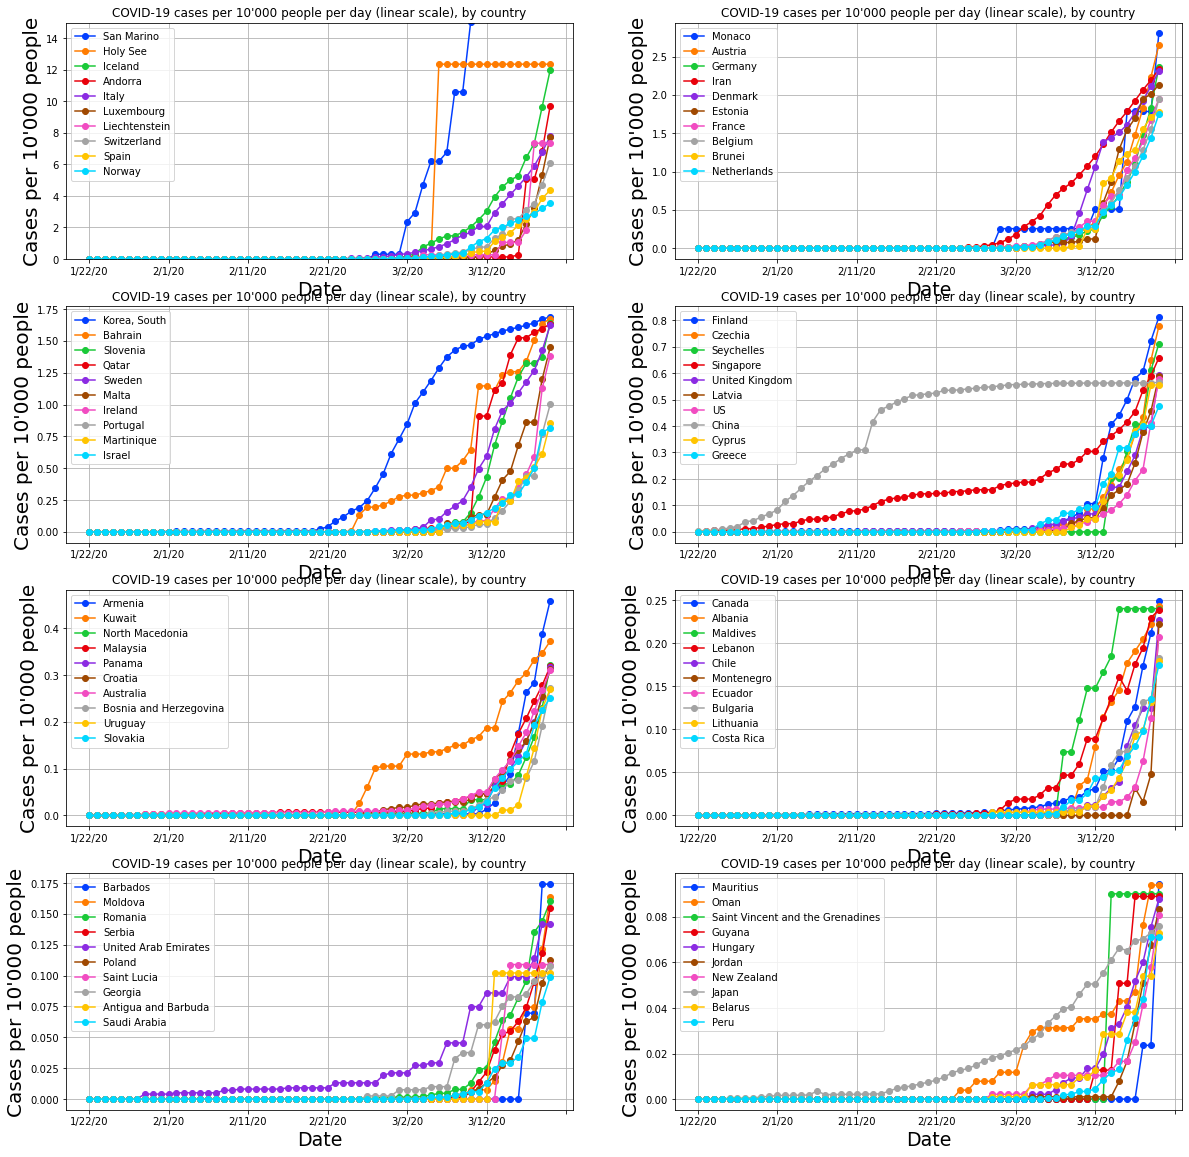

In [22]:
nrow=4
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)


for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_pop_norm_ordered[count*10:(count+1)*10].index.to_list()
        # plot_countries = [country for country in plot_countries if (country not in small_countries)]
        plot_countries = [country for country in plot_countries if not "Cruise" in country]
        # print(count*10,(count+1)*10,plot_countries)
        conf_pop_norm[plot_countries].plot(grid=True, marker='o', ax=axes[r,c],
                 title="COVID-19 cases per 10'000 people (linear scale), by country", figsize = (20,20))
        axes[r,c].set_xlabel("Date", fontsize=19)
        axes[r,c].set_ylabel("Cases per 10'000 people", fontsize=20)
        if r==0 and c==0:
            axes[r,c].set_ylim(0,15)
        count+=1

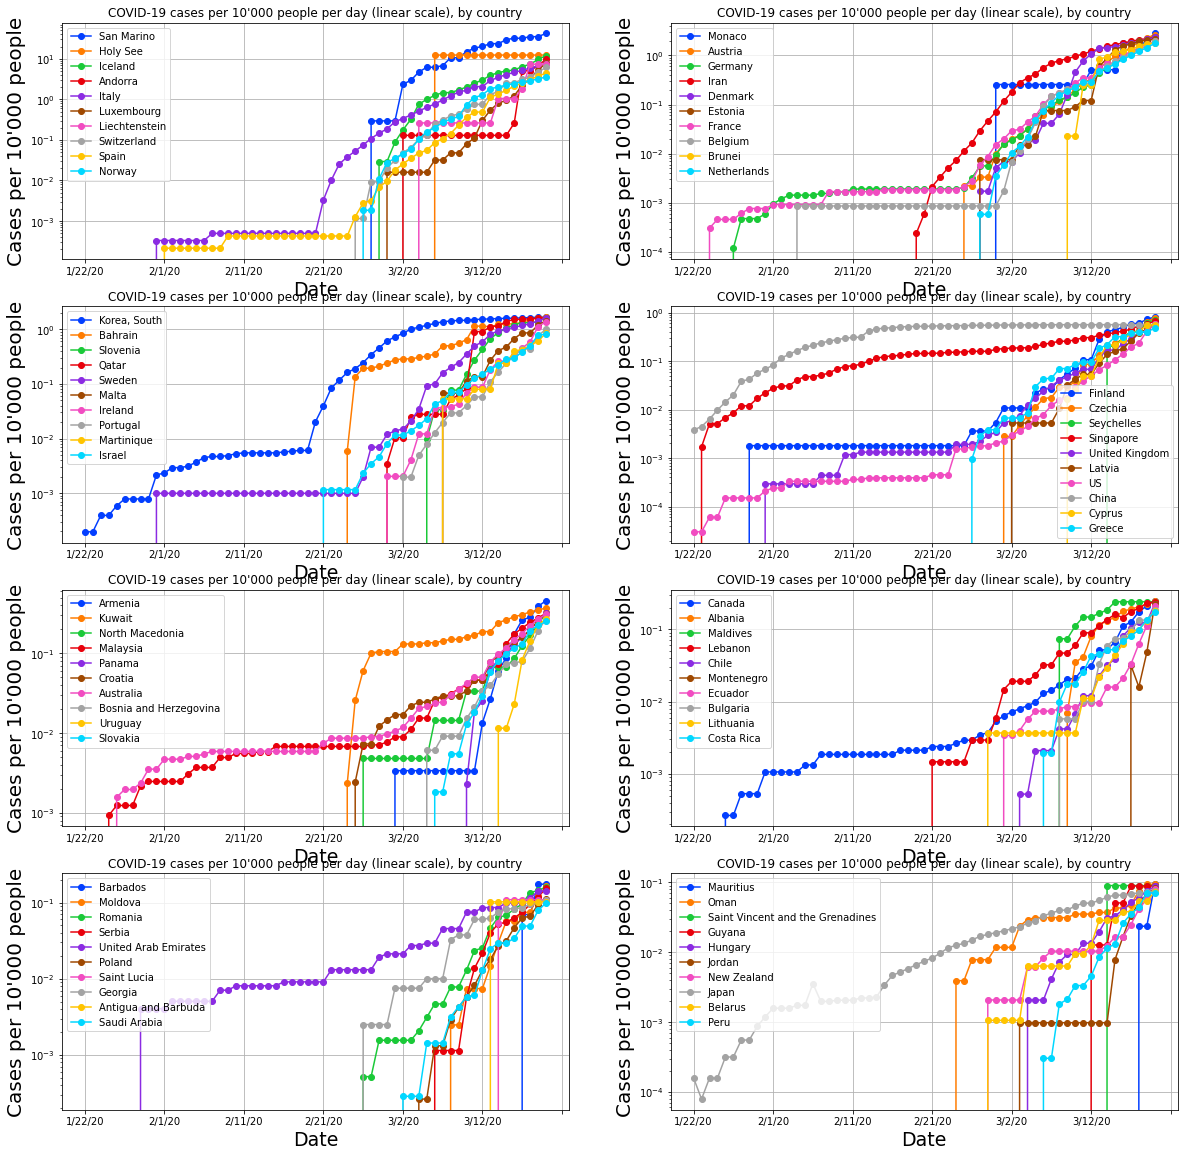

In [23]:
nrow=4
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_pop_norm_ordered[count*10:(count+1)*10].index.to_list()
        plot_countries = [country for country in plot_countries if not "Cruise" in country]
        # print(count*10,(count+1)*10,plot_countries)
        conf_pop_norm[plot_countries].plot(logy=True, grid=True, marker='o', ax=axes[r,c],
                 title="COVID-19 cases per 10'000 people (linear scale), by country", figsize = (20,20))
        axes[r,c].set_xlabel("Date", fontsize=19)
        axes[r,c].set_ylabel("Cases per 10'000 people", fontsize=20)
        count+=1